In [29]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 


In [30]:
df=pd.read_csv("heart.csv")

In [31]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [46]:
x=pd.DataFrame(df,columns=["age","trestbps","thalach"])
y=df["target"]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [58]:
lag=LogisticRegression()
lag.fit(x_train,y_train)
pred=lag.predict(x_test)

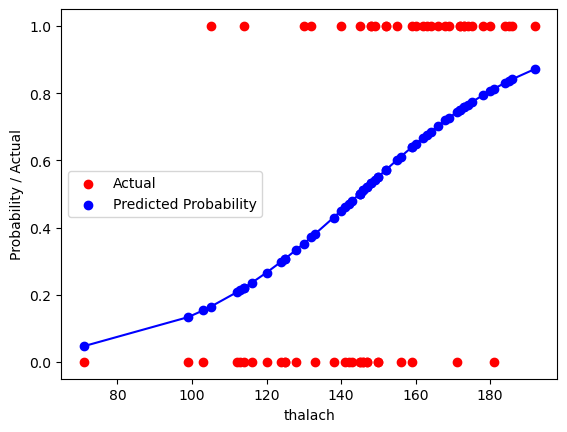

In [63]:
probs = lag.predict_proba(x_test)[:,1]
plt.scatter(x_test["thalach"], y_test, color="red", label="Actual")
plt.scatter(x_test["thalach"], probs, color="blue", label="Predicted Probability")
plt.plot(np.sort(x_test["thalach"]), probs[np.argsort(x_test["thalach"])], color="blue")
plt.xlabel("thalach")
plt.ylabel("Probability / Actual")
plt.legend()
plt.show()


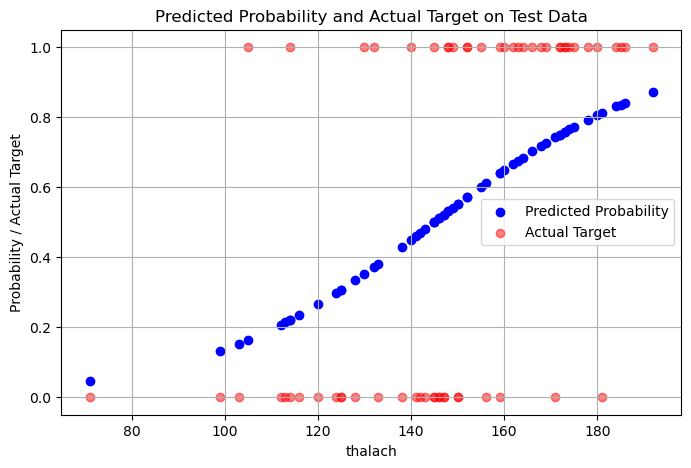

In [56]:


x_v = df[["thalach"]]

# تقسیم داده‌ها
x_train, x_test, y_train, y_test = train_test_split(x_v, y, random_state=42, test_size=0.2)

# آموزش مدل
lag = LogisticRegression()
lag.fit(x_train, y_train)

x_vals = np.linspace(x_v["thalach"].min(), x_v["thalach"].max(), 300).reshape(-1, 1)

# پیش‌بینی احتمال روی داده‌های تست
y_probs = lag.predict_proba(x_test)[:, 1]

# رسم نقاط پراکنده احتمال روی داده‌های تست
plt.figure(figsize=(8,5))
plt.scatter(x_test["thalach"], y_probs, color='blue', label='Predicted Probability')
plt.scatter(x_test["thalach"], y_test, color='red', alpha=0.5, label='Actual Target')
plt.xlabel('thalach')
plt.ylabel('Probability / Actual Target')
plt.title('Predicted Probability and Actual Target on Test Data')
plt.legend()
plt.grid(True)
plt.show()


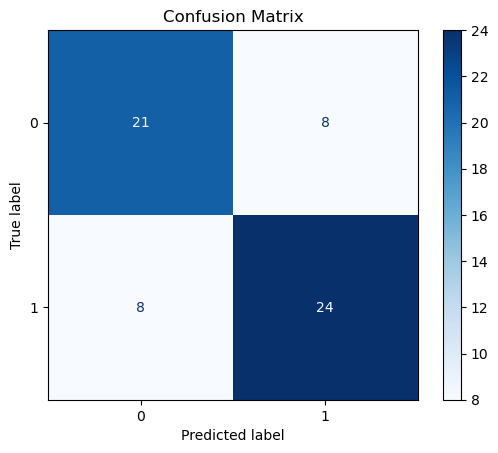

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# محاسبه ماتریس سردرگمی
cm = confusion_matrix(y_test, pred)

# نمایش بصری
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


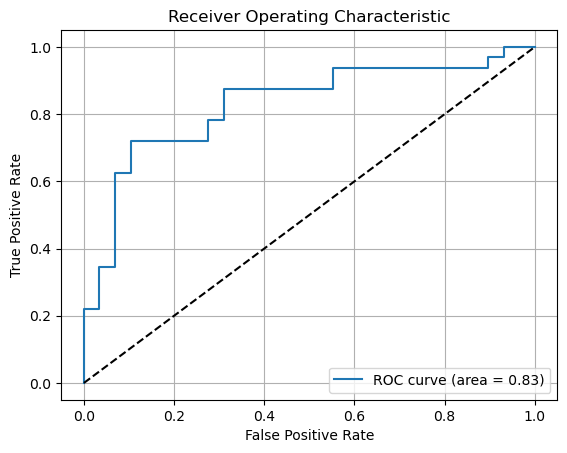

In [38]:
from sklearn.metrics import roc_curve, auc

# گرفتن احتمال‌ها به جای فقط برچسب‌ها
y_probs = lag.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # خط مرجع
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [39]:
import pandas as pd

# مقایسه بین y_test و pred
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(comparison_df.head(10))  # نمایش 10 مورد اول


     Actual  Predicted
179       0          0
228       0          1
111       1          1
246       0          1
60        1          0
9         1          1
119       1          1
223       0          0
268       0          0
33        1          1
